# Introduction and TCGA background

Liver cancer has the second highest worldwide cancer mortality rate and has limited therapeutic options.

The most common form of liver cancer is hepatocellular carcinoma (HCC), making up [80% of liver cancer cases](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga/studied-cancers/liver) in the US. HCC is the 9th leading cause of cancer-related deaths in the US, and third worldwide.
A consortium known as The Cancer Genome Atlas (TCGA) network has made a plethora of molecular information on various cancers, including HCC, publicly available. This data include genetic, molecular, diagnostic, demographic, and clinical information from over 350 patients with HCC.

While surgery can be an effective method for treating early-stage liver cancer, there are few options for more advanced and metastatic tumors. Sorafenib and regorafinib are the only approved treatments for managing advanced HCC, and many others potential therapeutics have failed in Phase III clinical trials. [Previous studies](https://www.cell.com/cell/fulltext/S0092-8674(17)30639-6) of genomic alterations in samples have found frequently-mutated genes LZTR1, EEF1A1, SF3B1, and SMARCA4.

In addition to DNA alterations however, different biological processes occurring in the tumor microenvironment can influence disease progression. By conducting a survey of how genes are expressed in tumor tissues at various stages of disease progression, we can better understand the underlying biological pathways contributing to tumorigenesis.

## RNA Sequencing

In this tutorial, we'll walk through how to obtain and process a type of gene expression data from a genomic technique, RNA-seq, and extract biological meaning from these large datasets as it relates to cancer genomics. TCGA represents one of the most comprehensive publicly-available datasets for cancer research. Datasets available through TCGA contain data on both biological (eg, gene expression) and clinical (eg, tumor progression) factors.

In biology, copies of our DNA are used as a template for creating different biological products and proteins. This intermediate copy is known as RNA. Unlike DNA, which is relatively static, RNA can change dynamically depending on environmental factors and stimuli. One method of obtaining gene expression data is through RNA sequencing (RNA-seq for short).

With RNA-seq, RNA is extracted from a sample, and transcribed to a more stable DNA copy(known as complementary DNA because it's the complement to the RNA sample). Sequencing works by attaching one side of each RNA molecule to a surface and repeatedly cycling through a process of attaching colored probes that bind to the RNA, imaging the probe, and washing off the probe. Rinse and repeat.

Following this process we now have tons of strings of T's,C's,G's, and A's that has been barcoded on either side of the sequence. Since each barcode attaches to a known and unique sequence of a gene, we can match these sequences to a reference genome.

Once the sequences have been mapped to their corresponding genes, we now have a quantification of gene expression for our samples. Depending on the question we are looking to answer, comparisons of gene expression between experimental conditions can be used to understand whether particular genetic components and molecular pathways influence that treatment. For instance, by performing RNA-seq on normal and tumor liver tissue can show granular differences in actively expressed (or suppressed) genes and provide insight into the role of certain genetic components in influencing tumor progression.

## Accessing genetic and clinical data from The Cancer Genome Atlas (TCGA)

**We'll be focusing on using RNA-seq data from LIHC combined with clinical attributes to identify biomarkers for disease progression.**

TCGA provides raw RNA-seq reads and other clinical data [here](https://portal.gdc.cancer.gov/projects/TCGA-LIHC) and in the R package _[RTCGA](http://rtcga.github.io/RTCGA/)_. This data is already outputted in the accompanying [GitHub](https://github.com/nyhais/hacknights/tree/master/tcga-series/post) as well.

The TCGA RNASeq data is a raw count of reads aligned to the gene transcript. After bias correction and gene normalization, the count data become rational numbers. This is known as the Illumina HI-seq Level 3 RSEM normalized expression data, which you can read more about [here](https://academic.oup.com/bioinformatics/article/26/4/493/243395). For this tutorial, we rounded up the rational numbers to the nearest integer, which can be interpreted as the effective read count for a gene in a given sample.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir=""
response_name="patient.race"
rnaseq_file=data_dir+"../workshop3/lihc_rnaseq.csv.gz"
clinical_file=data_dir+"../workshop3/revised_clinical.tsv"

First let's load the data:

In [7]:
rnaseq = (pd.
          read_csv(rnaseq_file,compression="gzip").
          set_index('bcr_patient_barcode').
          applymap(lambda x : int(np.ceil(x)))
         )
display(rnaseq.shape)
display(rnaseq.head())

(423, 20531)

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,0,2,4,91,1018,0,142,1,0,0,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,0,27,3,72,640,0,123,2,0,0,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,0,0,5,96,743,0,96,2,1,0,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,0,6,6,62,1187,0,281,1,0,0,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,0,12,6,105,879,0,283,0,0,0,...,42,1000,1632,5,1381,2903,576,666,3,120


We can clean up the column titles by extracting the common gene symbols from each.

In [8]:
gene_name_logical = [len(x[0])>1 for x in rnaseq.columns.str.split('|')]
sub = rnaseq.loc[:,gene_name_logical]
sub.columns = [x[0] for x in sub.columns.str.split('|')]
rnaseq_sub = sub.copy()
rnaseq_sub.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S-01A-11R-A37K-07,22283,584,0,375,0,286320,81,543,1,1032,...,25,274,795,19,500,3173,891,511,4,7
TCGA-2Y-A9GS-01A-12R-A38B-07,22642,1573,3,99,0,31169,163,2,1,903,...,69,633,1154,72,1001,5302,756,861,7,483
TCGA-2Y-A9GT-01A-11R-A38B-07,77670,1281,0,215,1,19515,119,1,3,773,...,47,1220,1134,13,1290,3220,861,524,15,84
TCGA-2Y-A9GU-01A-11R-A38B-07,9323,1253,0,2914,2,243941,72,0,0,722,...,19,286,1151,10,942,3093,1340,344,3,3
TCGA-2Y-A9GV-01A-11R-A38B-07,84243,1641,0,404,0,8756,83,0,9,828,...,42,1000,1632,5,1381,2903,576,666,3,120


We'll also load the clinical data from TCGA. This contains over a thousand clinical features characterizing the place of care, demographics, and treatment of patients, as well as sample specifications and preparations.

In [9]:
clin = pd.read_csv(clinical_file, compression=None, delimiter='\t').set_index('case_id')
clin.to_csv('clinical_revised.csv')

In [10]:
clinical = pd.read_csv(clinical_file, compression=None, delimiter='\t').set_index('case_id')
display(clinical.shape)
display(clinical.head())

(377, 46)

,submitter_id,project_id,gender,year_of_birth,race,days_to_birth,ethnicity,vital_status,days_to_death,age_at_index,...,treatment_effect,initial_disease_status,treatment_type,therapeutic_agents,regimen_or_line_of_therapy,treatment_intent_type,treatment_anatomic_site,treatment_outcome,days_to_treatment_end,treatment_or_therapy
case_id,,,,,,,,,,,,,,,,,,,,,
bce25281-502e-4599-9679-32dc8462ffb1,TCGA-DD-A4NE,TCGA-LIHC,female,1936,white,-27549,hispanic or latino,Dead,660.0,75.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
654af137-70d9-4ee4-9f69-793e352d30f8,TCGA-DD-A1EE,TCGA-LIHC,male,1933,white,-26858,not hispanic or latino,Dead,349.0,73.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
45f00f00-d793-4dca-aeb9-7626d4575c90,TCGA-GJ-A9DB,TCGA-LIHC,male,1945,white,-25020,not hispanic or latino,Dead,67.0,68.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
496beef9-80d9-4734-a23d-334ae1b6aaab,TCGA-DD-AAC8,TCGA-LIHC,male,1936,asian,-26322,not hispanic or latino,Dead,16.0,72.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,no
d1aa9c1a-d732-48c0-b669-8a14e0397344,TCGA-2Y-A9GV,TCGA-LIHC,female,1953,white,-20011,not hispanic or latino,Dead,2532.0,54.0,...,--,--,"Pharmaceutical Therapy, NOS",--,--,--,--,--,--,yes


## Exploratory data analysis

**Before we start any kind of modeling, it's a good idea to observe some high levels patterns within our data to understand what our data is representing and guide our subsequent modeling process.**


RNA-seq datasets provide a unique challenge in that they tend to be very wide (~20k genes for a human genome) and short (sequencing information on clinical samples can be expensive or unavailable and certain conditions may be very rare).

We can start by taking a look at the range of expression and distribution of the gene set. Since we have 20k of them, we can also assess whether certain genes have higher or lower than the average level of expression.

RNA-seq typically follows a [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution). If we take a look at the log of the coefficient of variation vs the log of mean gene counts for each gene/transcript across patient samples, we can see the spread of variability as genes are more highly expressed.

This kind of dispersion for gene expression estimates variability within the negative binomial distributed data and is analogous for viewing the variance for a normal distribution. Because we are never sampling randomly, dispersion does not penalize differences from the mean.

In [11]:
# We can work with the subset of genes that are expressed
exprs_genes = rnaseq_sub[rnaseq_sub>0].dropna(axis=1)

<Figure size 720x576 with 0 Axes>

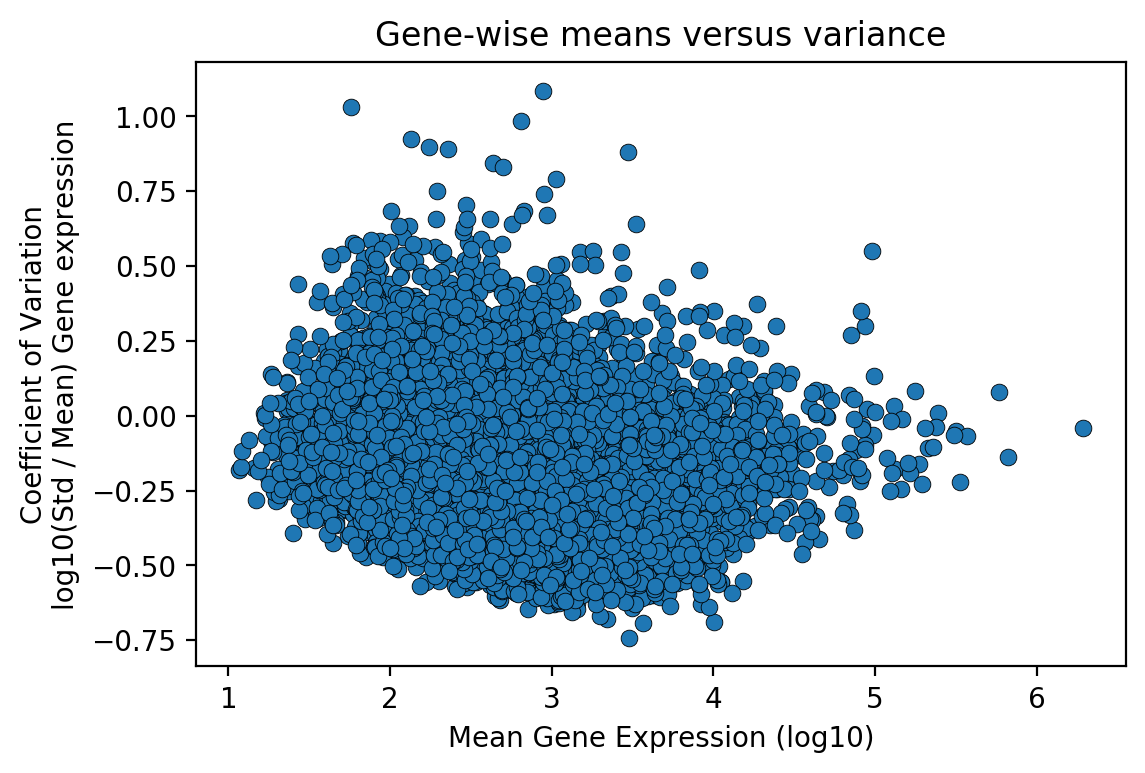

In [12]:
mean_vec = exprs_genes.mean()
sd_vec = exprs_genes.std()
cv_vec = sd_vec / mean_vec
fig = plt.figure(figsize=(10,8))
plt.figure(dpi=200)
plt.scatter(np.log10(mean_vec), np.log10(cv_vec),edgecolor='black',linewidth=.3)
plt.title('Gene-wise means versus variance')
plt.xlabel('Mean Gene Expression (log10)')
plt.ylabel('Coefficient of Variation\nlog10(Std / Mean) Gene expression');

In general, the variability of gene counts among samples is greater than the gene's mean expression (coefficient of variation is greater than 0.5 or less than -0.5 for many genes), a phenomenon known as "[overdispersion](https://bioramble.wordpress.com/2016/01/30/why-sequencing-data-is-modeled-as-negative-binomial)". This dispersion parameter of negative binomial distribution allows us to model the extra variance we see with RNA-seq experiments.

Let's choose a couple genes known to be related to the [hallmarks of cancer](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5446472/?report=classic). In the Github repo, you'll find a list of genes associated with the major hallmarks of cancer.

Let's choose a couple genes known to be related to the hallmarks of cancer. In the Github repo, you'll find a list of genes associated with the major hallmarks of cancer.

In [13]:
import pickle

gene_dict = pickle.load(open('hallmarks_of_cancer_geneset_dictionary.pkl', 'rb'))
gene_dict

{'HALLMARK_ADIPOGENESIS': array(['ABCA1', 'ABCB8', 'ACAA2', 'ACADL', 'ACADM', 'ACADS', 'ACLY',
        'ACO2', 'ACOX1', 'ADCY6', 'ADIG', 'ADIPOQ', 'ADIPOR2', 'AGPAT3',
        'AIFM1', 'AK2', 'ALDH2', 'ALDOA', 'ANGPT1', 'ANGPTL4', 'APLP2',
        'APOE', 'ARAF', 'ARL4A', 'ATL2', 'ATP1B3', 'ATP5PO', 'BAZ2A',
        'BCKDHA', 'BCL2L13', 'BCL6', 'C3', 'CAT', 'CAVIN1', 'CAVIN2',
        'CCNG2', 'CD151', 'CD302', 'CD36', 'CDKN2C', 'CHCHD10', 'CHUK',
        'CIDEA', 'CMBL', 'CMPK1', 'COL15A1', 'COL4A1', 'COQ3', 'COQ5',
        'COQ9', 'COX6A1', 'COX7B', 'COX8A', 'CPT2', 'CRAT', 'CS', 'CYC1',
        'CYP4B1', 'DBT', 'DDT', 'DECR1', 'DGAT1', 'DHCR7', 'DHRS7',
        'DHRS7B', 'DLAT', 'DLD', 'DNAJB9', 'DNAJC15', 'DRAM2', 'ECH1',
        'ECHS1', 'ELMOD3', 'ELOVL6', 'ENPP2', 'EPHX2', 'ESRRA', 'ESYT1',
        'ETFB', 'FABP4', 'FAH', 'FZD4', 'G3BP2', 'GADD45A', 'GBE1',
        'GHITM', 'GPAM', 'GPAT4', 'GPD2', 'GPHN', 'GPX3', 'GPX4', 'GRPEL1',
        'HADH', 'HIBCH', 'HSPB8', 'IDH1', 'IDH3

Loading the dictionary, we see that apoptosis, or programmed cell death, is one of the Hallmarks of Cancer. Let's look at the range of expression for a subset of genes across patient samples related to apoptosis.

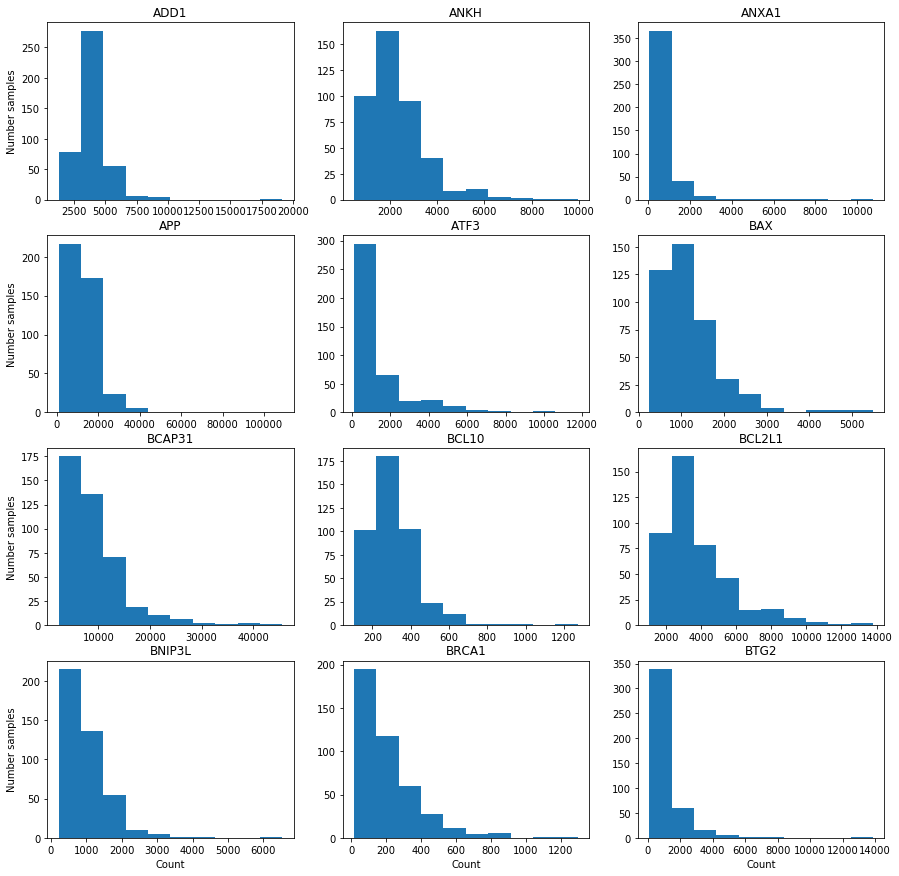

In [14]:
# Plot range of gene expression values
rows, cols = 4, 3
fig, axs = plt.subplots(rows, cols, figsize=(15,15))
genes = ['ADD1', 'ANKH', 'ANXA1', 'APP', 'ATF3', 'BAX', 'BCAP31', 'BCL10', 'BCL2L1', 'BNIP3L', 'BRCA1', 'BTG2']
i = 0
for row in range(rows):
    for col in range(cols):
        axs[row, col].hist(exprs_genes[genes[i]].values)
        axs[row, col].title.set_text(genes[i])
        if col%3 == 0:
            axs[row, col].set_ylabel('Number samples')
        if row >= 3:
            axs[row, col].set_xlabel('Count')
        i += 1



Just by looking at a few of these genes, we can see that expression varies differently between tumor samples. Some genes tend to have a heavy left skew, while others tend to cluster above low expression. We can also see that the range of values varies greatly both within and between genes.

Let's look at a couple of genes related to homeostasis:

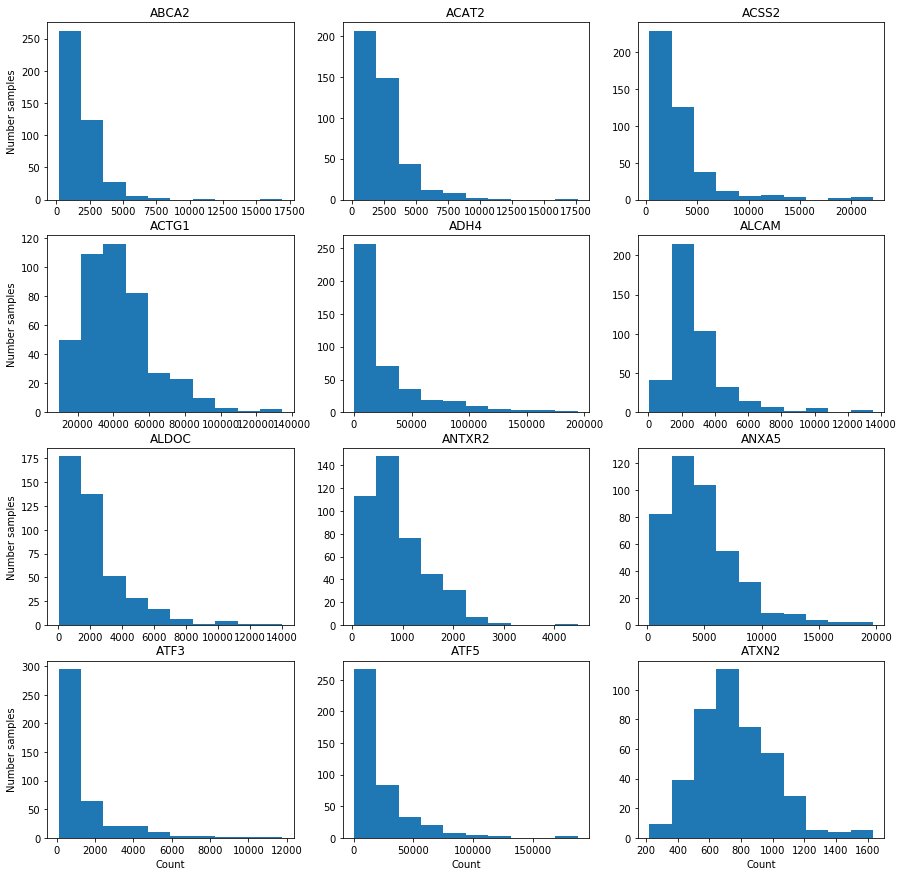

In [15]:
# Plot range of gene expression values
rows, cols = 4, 3
fig, axs = plt.subplots(rows, cols, figsize=(15,15))
genes = ['ABCA2', 'ACAT2', 'ACSS2', 'ACTG1', 'ADH4', 'ALCAM', 'ALDOC',
        'ANTXR2', 'ANXA5', 'ATF3', 'ATF5', 'ATXN2', 'AVPR1A']
i = 0
for row in range(rows):
    for col in range(cols):
        axs[row, col].hist(exprs_genes[genes[i]].values)
        axs[row, col].title.set_text(genes[i])
        if col%3 == 0:
            axs[row, col].set_ylabel('Number samples')
        if row >= 3:
            axs[row, col].set_xlabel('Count')
        i += 1

Let's look at gene expression across the entire set of expressed genes.

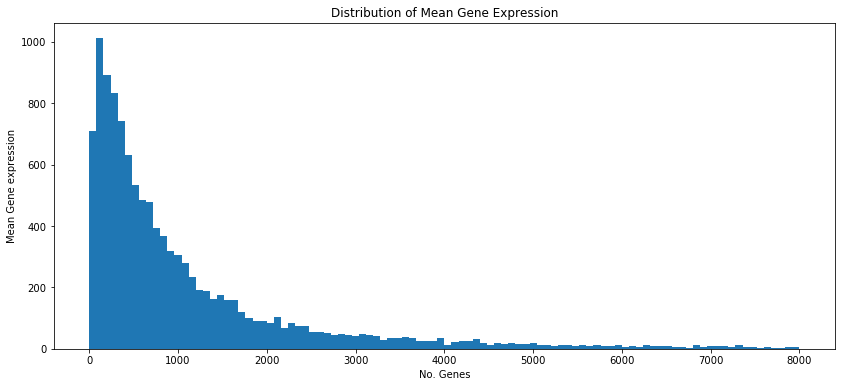

In [24]:
plt.figure(figsize=(14,6))
plt.hist(exprs_genes.mean(axis=0), range=(0, 8000), bins=100)
plt.title('Distribution of Mean Gene Expression')
plt.xlabel('No. Genes')
plt.ylabel('Mean Gene expression');

Plotting the entire range of expressed genes shows that while the majority of genes have counts <= 4000, there are some which have an average expression over 500k counts. We can use our hallmark dictionary to take a look at some what some these genes are involved in.

In [37]:
# Turn gene_dict into a dataframe
gene_df = pd.DataFrame.from_dict(gene_dict, orient = 'index').reset_index() \
    .melt(id_vars=["index"], 
            var_name="col", 
            value_name="gene") \
    .drop('col', axis=1) \
    .dropna()
gene_df.rename(columns={'index': 'hallmark'}, inplace=True)
gene_df

,hallmark,gene
0,HALLMARK_ADIPOGENESIS,ABCA1
1,HALLMARK_ALLOGRAFT_REJECTION,AARS
2,HALLMARK_ANDROGEN_RESPONSE,ABCC4
3,HALLMARK_ANGIOGENESIS,APOH
4,HALLMARK_APICAL_JUNCTION,ACTA1
5,HALLMARK_APICAL_SURFACE,ADAM10
6,HALLMARK_APOPTOSIS,ADD1
7,HALLMARK_BILE_ACID_METABOLISM,ABCA1
8,HALLMARK_CHOLESTEROL_HOMEOSTASIS,ABCA2
9,HALLMARK_COAGULATION,A2M


In [38]:
highly_exprs_genes = pd.DataFrame(exprs_genes.mean()[exprs_genes.mean(axis=0) > 100000])
highly_exprs_genes = pd.merge(highly_exprs_genes.reset_index(), gene_df, left_on='index', right_on='gene')
highly_exprs_genes

,index,0,hallmark,gene
0,ALB,1.942837e+06,HALLMARK_PEROXISOME,ALB
1,ALDOB,1.316031e+05,HALLMARK_HYPOXIA,ALDOB
2,ALDOB,1.316031e+05,HALLMARK_GLYCOLYSIS,ALDOB
3,APOA1,2.445005e+05,HALLMARK_COAGULATION,APOA1
4,APOA1,2.445005e+05,HALLMARK_BILE_ACID_METABOLISM,APOA1
5,APOC1,1.463239e+05,HALLMARK_COAGULATION,APOC1
6,APOC1,1.463239e+05,HALLMARK_COMPLEMENT,APOC1
7,APOC3,1.248927e+05,HALLMARK_COAGULATION,APOC3
8,APOE,2.116336e+05,HALLMARK_ADIPOGENESIS,APOE
9,APOE,2.116336e+05,HALLMARK_XENOBIOTIC_METABOLISM,APOE


Coagulation seems to be highly expressed in these samples.

In [39]:
highly_exprs_genes.hallmark.value_counts()

HALLMARK_COAGULATION                          11
HALLMARK_COMPLEMENT                            6
HALLMARK_XENOBIOTIC_METABOLISM                 4
HALLMARK_ADIPOGENESIS                          3
HALLMARK_KRAS_SIGNALING_UP                     3
HALLMARK_ESTROGEN_RESPONSE_LATE                2
HALLMARK_ANGIOGENESIS                          2
HALLMARK_HEME_METABOLISM                       1
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY       1
HALLMARK_GLYCOLYSIS                            1
HALLMARK_CHOLESTEROL_HOMEOSTASIS               1
HALLMARK_APOPTOSIS                             1
HALLMARK_MYOGENESIS                            1
HALLMARK_PEROXISOME                            1
HALLMARK_INTERFERON_GAMMA_RESPONSE             1
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION     1
HALLMARK_BILE_ACID_METABOLISM                  1
HALLMARK_HYPOXIA                               1
Name: hallmark, dtype: int64

## Combining RNA signatures with clinical characteristics to understand disease progression at the molecular level

One of the questions that we are interested in understanding is whether there are RNA signatures that are change according to disease progression for hepatocellular carcinoma. Taking a look at the clinical characteristics we find that tumor stage is one of the features available in the clinical data set.

A quick look at tumor stages shows that there are 4 main stages of HCC, with stage 1 being the least invasive and stage 4 being being advanced or metastatic cancer.

In [40]:
clinical['tumor_stage'].value_counts()

stage i         175
stage ii         87
stage iiia       65
not reported     24
stage iiib        9
stage iiic        9
stage iii         3
stage ivb         2
stage iv          2
stage iva         1
Name: tumor_stage, dtype: int64

We will join our clinical characteristics with the RNA-seq data.

In [41]:
# Since the barcodes vary slightly, we'll need to reformat the colummns to match each other first
rnaseq_sub.index= rnaseq_sub.reset_index()['bcr_patient_barcode'].apply(lambda barcode: '-'.join(barcode.split('-')[:3])).values
rnaseq_sub.index.name = 'bcr_patient_barcode'

In [42]:
# Merge the clinical and rna-seq data
full_df = pd.merge(rnaseq_sub.reset_index(), clinical[['submitter_id','tumor_stage']], left_on='bcr_patient_barcode', right_on='submitter_id', how='inner') \
    .set_index('bcr_patient_barcode') \
    .drop('submitter_id', axis=1)
#ensuring ID uniqueness
full_df.index = [x+'-'+str(i) for i,x in enumerate(full_df.index)]
full_df.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,tumor_stage
TCGA-2V-A95S-0,22283,584,0,375,0,286320,81,543,1,1032,...,274,795,19,500,3173,891,511,4,7,stage ii
TCGA-2Y-A9GS-1,22642,1573,3,99,0,31169,163,2,1,903,...,633,1154,72,1001,5302,756,861,7,483,not reported
TCGA-2Y-A9GT-2,77670,1281,0,215,1,19515,119,1,3,773,...,1220,1134,13,1290,3220,861,524,15,84,stage i
TCGA-2Y-A9GU-3,9323,1253,0,2914,2,243941,72,0,0,722,...,286,1151,10,942,3093,1340,344,3,3,stage i
TCGA-2Y-A9GV-4,84243,1641,0,404,0,8756,83,0,9,828,...,1000,1632,5,1381,2903,576,666,3,120,stage i


We'll also clean up our data, combining all the sub-stages into one of the four main tumor stages (stage i, stage ii, stage iii, stage iv) and removing any unreported instances for now.

In [43]:
# Subset full dataframe for patient samples that have a corresponding tumor stage
full_df = full_df.loc[full_df['tumor_stage'].str.startswith('stage')]

# Since there are substages (eg, stage iia and stage iib), we will convert them to the 4 main stages
full_df['tumor_stage'] = full_df['tumor_stage'].str.replace('stage ', '') \
                            .str.replace('a', '') \
                            .str.replace('b', '') \
                            .str.replace('c', '') \
                            .str.replace('v', '')
full_df['tumor_stage'].value_counts()

i      196
ii      98
iii     97
Name: tumor_stage, dtype: int64

In [44]:
full_df.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,tumor_stage
TCGA-2V-A95S-0,22283,584,0,375,0,286320,81,543,1,1032,...,274,795,19,500,3173,891,511,4,7,ii
TCGA-2Y-A9GT-2,77670,1281,0,215,1,19515,119,1,3,773,...,1220,1134,13,1290,3220,861,524,15,84,i
TCGA-2Y-A9GU-3,9323,1253,0,2914,2,243941,72,0,0,722,...,286,1151,10,942,3093,1340,344,3,3,i
TCGA-2Y-A9GV-4,84243,1641,0,404,0,8756,83,0,9,828,...,1000,1632,5,1381,2903,576,666,3,120,i
TCGA-2Y-A9GW-5,73056,1423,0,270,0,43813,299,0,1,622,...,1647,707,30,748,8467,993,457,7,103,i


In [45]:
full_df.index.name = 'bcr_patient_barcode'
full_df.reset_index().to_csv('full_df.csv', index=False)

Now that we have an attribute to differentiate samples, we can explore how patterns of expression may differ between these groups.

## Differential Expression Analysis

We can statistically test for a difference in gene expression by performing a hypothesis test for each gene to see whether there is evidence to decide that expression is signficantly different between conditions. 
In this section, we will investigate differential expression results derived from the [DESeq2] package in R. Also see this [vignette](https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html) on how to do these analyses, as well as understand the methods. 

Briefly, a Sample x Gene matrix of raw count reads and a matching matrix of phenotypes (eg, treatment or condition) for each sample are inputted into DEseq2. In order to account for RNA composition bias and library size, when only a small number of genes are highly expressed in one condition vs another, these genes are normalized by diving the expression by the mean expression for each gene across samples. 

DEseq2 fits a [negative binomial](https://en.wikipedia.org/wiki/Negative_binomial_distribution) generalized linear model to each gene and uses the [Wald test](https://www.statisticshowto.datasciencecentral.com/wald-test) for significance. Outliers are detected using Cooke's distance and removed from the dataset. Genes with low normalized mean expression values below a threshbold are also removed to improve detection power. https://chipster.csc.fi/manual/deseq2.html

### Running differential expression analysis via DEseq2
R by far has the richest library of bioinformatics tools available. However, to create a python-friendly workflow, we have created a subprocess to run the R package DESeq2 with our RNA-seq data and return the results in a python-friendly format.
To run this script on the command line use:
```
Rscript TCGA_differential_expression_analysis.R full i ii
```

(script name | rna_seq_file.csv.gz | clinical_data_file.csv.gz | num_genes_to_run | clinical_attribute_col | atttribute 1 | attribute 2

Use the output of this file to plot and identify differentially-expressed genes. You can change the clinical columns, attributes and number of genes to explore additional clinical variables.

Viewing the results from running differential expression analysis, we can see the output consists of the genes sampled in each row, along with the mean expression of that gene, the fold change and the pvalue of whether it was significantly expressed

In [46]:
de_stage_i_ii = pd.read_csv('lihc_DESeq2_full_sampled_genes_tumor_stage_i_vs_ii.csv')
de_stage_i_ii.head(10)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
0,51530.278974,0.317265,0.195171,1.625571,0.104041,0.434561,A1BG
1,1701.155417,0.039452,0.115477,0.341640,0.732622,0.947396,A1CF
2,0.341469,0.110960,0.629613,0.176235,0.860110,0.978906,A2BP1
3,302.325877,0.159307,0.126984,1.254540,0.209646,0.602383,A2LD1
4,0.846050,-0.490344,0.569334,-0.861260,NaN,NaN,A2ML1
5,89226.274345,0.189610,0.181457,1.044929,0.296056,0.692876,A2M
6,175.277808,-0.308768,0.147156,-2.098233,0.035885,0.257278,A4GALT
7,8.285526,0.259137,0.421185,0.615256,NaN,NaN,A4GNT
8,4.749911,0.524862,0.416442,1.260348,0.207544,0.599819,AAA1
9,891.054745,-0.073471,0.049676,-1.479006,0.139139,0.498075,AAAS


To help us visualize the data let's create a diagnostic plot.  An MA-plot shows the log2-fold changes from the treatment over the mean of normalized counts, i.e. the average of counts normalized by size factor.

Observing the log2-fold change, we see most genes decrease in expression in stage II samples. A fold-change of +/- 2 is often considered a threshold for significant differential expression.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


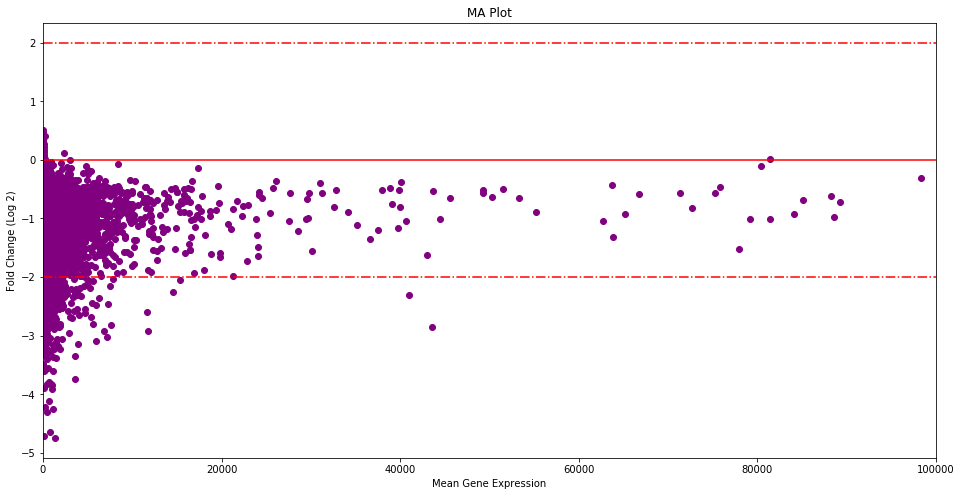

In [47]:
plt.figure(figsize=(16,8))
plt.scatter(de_stage_i_ii['baseMean'], np.log10(de_stage_i_ii['log2FoldChange']), c='purple')
plt.xlim(0,100000);
plt.xlabel('Mean Gene Expression')
plt.ylabel('Fold Change (Log 2)')
plt.title('MA Plot')
plt.plot(np.linspace(0, 100000, 100), np.linspace(0, 0, 100), c='red')
plt.plot(np.linspace(0, 100000, 100), np.linspace(2, 2, 100), c='red', ls='-.')
plt.plot(np.linspace(0, 100000, 100), np.linspace(-2, -2, 100), c='red', ls='-.')

Similarly, let's plot expression of differentially-expressed genes from stage II to stage III.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


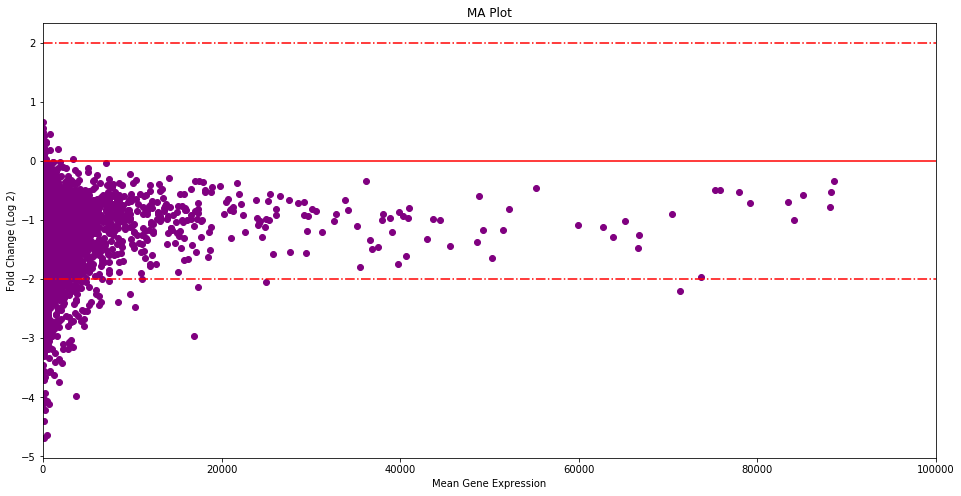

In [48]:
de_stage_ii_iii = pd.read_csv('lihc_DESeq2_full_sampled_genes_tumor_stage_ii_vs_iii.csv')

plt.figure(figsize=(16,8))
plt.scatter(de_stage_ii_iii['baseMean'], np.log10(de_stage_ii_iii['log2FoldChange']), c='purple')
plt.xlim(0,100000);
plt.xlabel('Mean Gene Expression')
plt.ylabel('Fold Change (Log 2)')
plt.title('MA Plot')
plt.plot(np.linspace(0, 100000, 100), np.linspace(0, 0, 100), c='red')
plt.plot(np.linspace(0, 100000, 100), np.linspace(2, 2, 100), c='red', ls='-.')
plt.plot(np.linspace(0, 100000, 100), np.linspace(-2, -2, 100), c='red', ls='-.')

We can subset the signficantly-expressed genes between stages I and II by p-value and fold-change

In [49]:
deg_i_ii = de_stage_i_ii[de_stage_i_ii['pvalue'] <= 0.01]
deg_i_ii = deg_i_ii[abs(deg_i_ii['log2FoldChange']) >= 2].sort_values('log2FoldChange')
deg_i_ii

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene
4335,5.137867,-4.002609,0.857635,-4.667030,3.055844e-06,5.167622e-04,CT45A1
7698,59.444529,-3.665525,0.479048,-7.651689,1.983570e-14,7.183911e-11,HEATR7B2
18351,17.022182,-3.301853,0.704600,-4.686135,2.784130e-06,4.836540e-04,TMPRSS15
16365,3.234402,-3.283411,0.671138,-4.892302,9.966361e-07,2.240555e-04,SLC6A15
18909,1.870359,-3.113032,0.446757,-6.968063,3.213333e-12,5.116965e-09,TUBAL3
15777,1.732108,-3.019926,0.742909,-4.065003,4.803190e-05,3.973340e-03,SERPINB4
7985,19.026081,-2.967751,0.563987,-5.262090,1.424272e-07,4.320067e-05,HOXB13
4125,3.655367,-2.933798,0.609392,-4.814305,1.477127e-06,2.880247e-04,CPA2
4031,17.228710,-2.892492,0.297759,-9.714202,2.622964e-22,5.012223e-18,COL4A6
13887,65.717795,-2.812945,0.422609,-6.656148,2.810977e-11,2.984164e-08,PPP1R1B


We find 51 genes to be differentially expressed between stage I and stage II tumor samples ( p < 0.01) and with a fold change >= 2.0. A brief survey of some of these reveals some promising candidates.

[SERPINB4](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3396600), a proteinase inhibitor, has been found to be overexpressed in patients with chronic liver disease, including HCC.

NR0B1, also known as DAX1, is a transcriptional receptor responsible for inhibiting transcription of several hormones. There is evidence that [NR0B1 expression is reduced](https://www.karger.com/Article/FullText/363038) in HCC samples and can inhibit HCC carcinogenesis when overexpressed.  

CT45A1 is a protien shown to be contribute to tumorigenesis [when overexpressed](https://www.nature.com/articles/cddis2014244).

SLC6A15 is an amino acid transporter, possibly involved in increased metabolism in [lung cancer](https://cancerres.aacrjournals.org/content/75/15_Supplement/1711).

## Gene Ontology Enrichment Analysis

[Gene ontologies](https://en.wikipedia.org/wiki/Gene_ontology) are a controlled vocabulary of gene and gene product attributes that aim to classify genes and their functions. The ontology covers 3 domains:
 - cellular component, the parts of a cell or its extracellular environment;
 - molecular function, the elemental activities of a gene product at the molecular level, such as binding or catalysis;
 - biological process, operations or sets of molecular events with a defined beginning and end, pertinent to the functioning of integrated living units: cells, tissues, organs, and organisms.

Each GO term within the ontology has a term name, which may be a word or string of words; a unique alphanumeric identifier; a definition with cited sources; and an ontology indicating the domain to which it belongs. Terms may also have synonyms, which are classed as being exactly equivalent to the term name, broader, narrower, or related; references to equivalent concepts in other databases; and comments on term meaning or usage. The GO ontology is structured as a directed acyclic graph, and each term has defined relationships to one or more other terms in the same domain, and sometimes to other domains.

Since looking at a list of gene symbols is difficult to interpret we'll use GO's to get a broad idea what kinds of changes are occuring during tumor progression. We can do this by performing enrichment analysis and identifying functions that are over-represented based on our gene set.

There is one important point to keep in mind during the analysis: statistically significant is different from biologically meaningful. That said, it is typically possible to obtain some biological or technical insight about the underlying experiment from statistically enriched terms, even if it isn’t readily apparent.[Galaxy project](https://galaxyproject.github.io/training-material/topics/transcriptomics/tutorials/goenrichment/tutorial.html)

To do this we'll use a [python library]([https://github.com/tanghaibao/goatools) for gene ontology analysis, [GOA Tools](https://www.nature.com/articles/s41598-018-28948-z).

GOATOOLS compares the frequency of genes for a particular GO term in the sample to the frequency in the background and computes a P-value using Fisher’s exact test. 

We'll also use GOA tools to visualize our represented gene ontologies in a directed acyclic graph.

In [51]:
from goatools.obo_parser import GODag
from goatools.base import download_ncbi_associations
from goatools.anno.genetogo_reader import Gene2GoReader

from goatools.test_data.genes_NCBI_9606_ProteinCoding import GENEID2NT as GeneID2nt_hom
from goatools.goea.go_enrichment_ns import GOEnrichmentStudyNS
from goatools.godag_plot import plot_gos, plot_results, plot_goid2goobj

ModuleNotFoundError: No module named 'goatools'

In [52]:
obodag = GODag("go-basic.obo")

fin_gene2go = download_ncbi_associations()

# Read NCBI's gene2go. Store annotations in a list of namedtuples
objanno = Gene2GoReader(fin_gene2go, taxids=[9606])

# Get namespace2association where:
#    namespace is:
#        BP: biological_process               
#        MF: molecular_function
#        CC: cellular_component
#    assocation is a dict:
#        key: NCBI GeneID
#        value: A set of GO IDs associated with that gene
ns2assoc = objanno.get_ns2assc()

for nspc, id2gos in ns2assoc.items():
    print("{NS} {N:,} annotated human genes".format(NS=nspc, N=len(id2gos)))
    

goeaobj = GOEnrichmentStudyNS(
        GeneID2nt_hom.keys(), # List of human protein-coding genes
        ns2assoc, # geneid/GO associations
        obodag, # Ontologies
        propagate_counts = False,
        alpha = 0.05, # default significance cut-off
        methods = ['fdr_bh']) # defult multipletest correction method


NameError: name 'GODag' is not defined

In [53]:
# convert genes symbols to gene IDs
geneid_symbol_dict = {gene_id: data.Symbol for gene_id, data in GeneID2nt_hom.items()}

deg_i_ii_geneids = [gene_id for gene_id, symbol in geneid_symbol_dict.items() if symbol in de_stage_i_ii['Gene'].values]

NameError: name 'GeneID2nt_hom' is not defined

In [54]:
# 'p_' means "pvalue". 'fdr_bh' is the multipletest method we are currently using.
geneids_study = deg_i_ii_geneids
goea_results_all = goeaobj.run_study(geneids_study)
goea_results_sig = [r for r in goea_results_all if r.p_fdr_bh < 0.05]

NameError: name 'deg_i_ii_geneids' is not defined

In [55]:
results = pd.DataFrame(columns=goea_results_sig[0].__dict__.keys())

for record in goea_results_sig:
    results = pd.concat([results, pd.DataFrame(pd.Series(record.__dict__)).transpose()], axis=0, sort=False)

results = results.sort_values('p_fdr_bh', ascending=True).reset_index(drop=True)

NameError: name 'goea_results_sig' is not defined

We'll subset only the most significant GO terms since the visualization is unwiedly otherwise.

In [56]:
results

NameError: name 'results' is not defined

GO terms colored by P-value:
- pval < 0.005 (light red)
- pval < 0.01 (light orange)
- pval < 0.05 (yellow)
- pval > 0.05 (grey) Study terms that are not statistically significant

We can create a plot of all resulting GO terms

In [57]:
plot_results("nbt3102_{NS}.png", goea_results_sig)

NameError: name 'plot_results' is not defined

However, since this can be unwieldy, we'll also create a subplot with only the most significant GO terms

In [58]:
# Create subplot

goid_subset = results.loc[results['depth'] > 2, 'GO'][:10].values

plot_gos("nbt3102_MF_RNA_genecnt.png", 
    goid_subset, # Source GO ids
    obodag, 
    goea_results=goea_results_all,
    id2symbol=geneid_symbol_dict, # Print study gene Symbols, not Entrez GeneIDs
    study_items=6, # Only only 6 gene Symbols max on GO terms
    items_p_line=3, # Print 3 genes per line
        ) # Use pvals for coloring

NameError: name 'results' is not defined

From here we see that certain functions are represented within our differentially expressed genes. These terms can be difficult to interpret as they can be generic (nucleus, plasma membrane) and don't hold much specific meaning, or can be so specific that they do not give a broad sense of the pathways and general functions occurring. The interesting terms are those that have enough information to be biologically interpretable, and generic enough to integrate multiple gnes.

Some of the GO terms that are biological processes and in the sweet spot of being not too broad and not too specific give some insight into some of the regulation occurring:
- GO:0043066: negative regulation of apoptotic process
- GO:0008284: positive regulation of cell population proliferation
- GO:0043547: positive regulation of GTPase activity
- GO:0051897: positive regulation of protein kinase B signaling
- GO:0033209: tumor necrosis factor-mediated signaling pathway
- GO:0043123: positive regulation of I-kappaB kinase/NF-kapp..
- GO:0008360: regulation of cell shape
- GO:0001525: angiogenesis
- GO:0038095: Fc-epsilon receptor signaling pathway
- GO:0090090: negative regulation of canonical Wnt signaling..
- GO:0030335: positive regulation of cell migration

## Conclusion

Gene expression data can provide important information about the tumor microenvironment that elucidates the functional processes leading to tumor progression. In this post we walked through how Python can be used to process RNA-seq data from liver cancer samples from The Cancer Genome Atlas. Matched with clinical data, we were able to explore how RNA-seq data can vary from early to advanced tumor stages and identify genes that may influence, or be a marker for disease progression.

In our next post we'll use supervised and unsupervised machine learning models to find molecular markers for disease progression.